<a href="https://www.kaggle.com/code/junaidullhassan/titanic-disaster-with-pipeline?scriptVersionId=161687794" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [251]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings as wn
wn.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [252]:
# fetch dataset from files
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')
y_test_df = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

In [253]:
train_df.shape,test_df.shape

((891, 12), (418, 11))

In [254]:
y_test = y_test_df['Survived']
y_test.head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

In [255]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Analysis

In [309]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

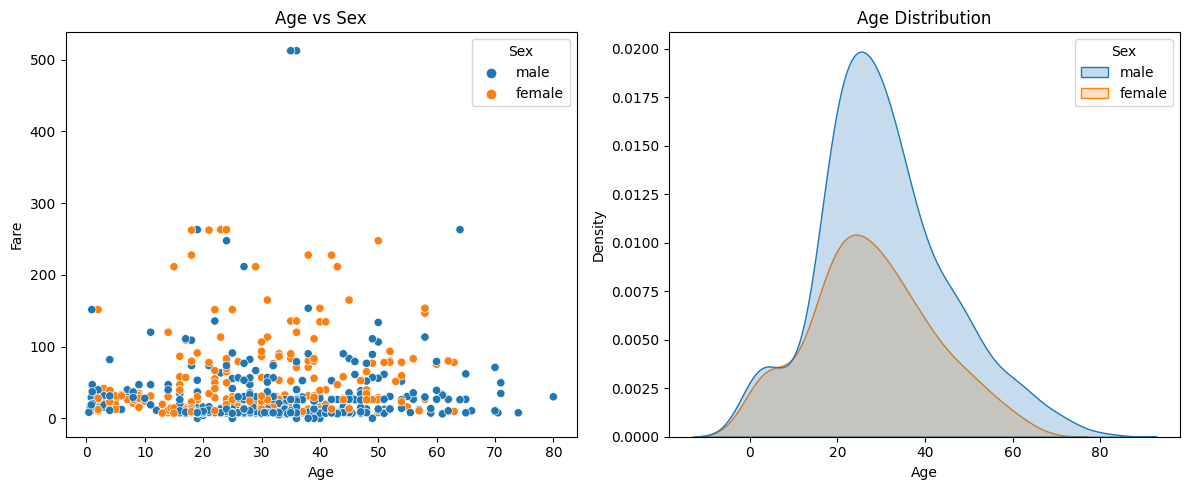

In [257]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Age vs Sex Scatterplot
axes[0].set_title('Age vs Sex')
sns.scatterplot(x=train_df['Age'], y=train_df['Fare'], hue=train_df['Sex'], ax=axes[0])

# Age Distribution
axes[1].set_title('Age Distribution')
sns.kdeplot(data=train_df, x='Age', hue='Sex', fill=True, ax=axes[1])

# Show the plots
plt.tight_layout()
plt.show()

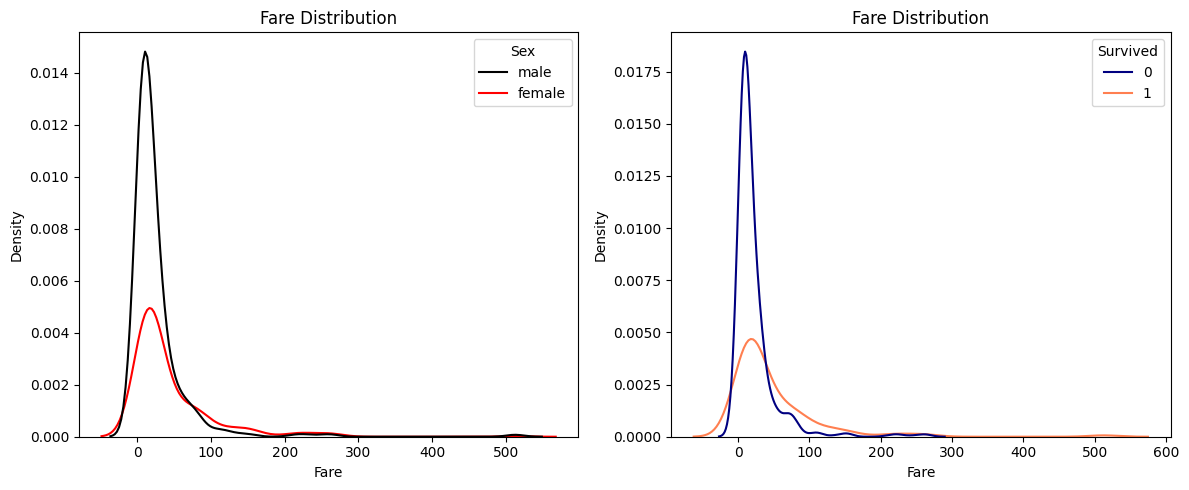

In [258]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 5))

# Plotting the first subplot (Fare Distribution by Sex)
axes[0].set_title('Fare Distribution')
sns.kdeplot(data=train_df, x='Fare', hue='Sex', palette=['black', 'red'], ax=axes[0])

# Plotting the second subplot (Fare Distribution by Survived)
axes[1].set_title('Fare Distribution')
sns.kdeplot(data=train_df, x='Fare', hue='Survived', palette=['navy', 'coral'], ax=axes[1])

plt.tight_layout()
plt.show()

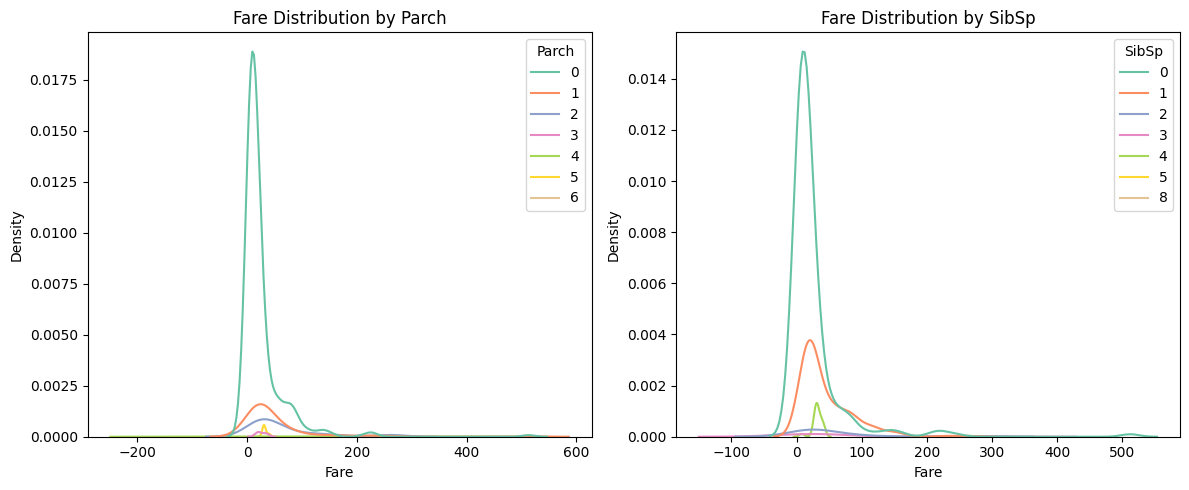

In [259]:
custom_palette = sns.color_palette("Set2", 8)

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 5))

# Plotting the first subplot (Fare Distribution by Parch)
axes[0].set_title('Fare Distribution by Parch')
sns.kdeplot(data=train_df, x='Fare', hue='Parch', palette=custom_palette, ax=axes[0])

# Plotting the second subplot (Fare Distribution by SibSp)
axes[1].set_title('Fare Distribution by SibSp')
sns.kdeplot(data=train_df, x='Fare', hue='SibSp', palette=custom_palette, ax=axes[1])

plt.tight_layout()
plt.show()

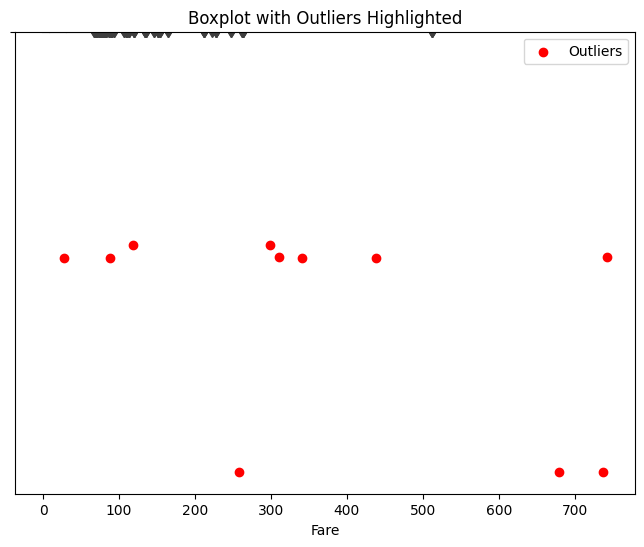

In [315]:
z_scores = np.abs(stats.zscore(train_df['Fare']))
threshold = 4
outliers = train_df[np.abs(z_scores) > threshold]

# Visualize outliers using a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=train_df['Fare'])
plt.title('Boxplot with Outliers Highlighted')
plt.scatter(outliers.index, outliers['Fare'], color='r', label='Outliers')
plt.legend()
plt.show()

# Feature Engineering and Preprocessing

In [260]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [261]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [262]:
# delete unneccessary Columns
train_df.drop(['Name','PassengerId'],axis=1,inplace=True)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [263]:
# remove character in ticket column
train_df['Ticket'] = train_df['Ticket'].str.replace('[^0-9]', '', regex=True)

# Convert the column to numeric values (optional)
train_df['Ticket'] = pd.to_numeric(train_df['Ticket'], errors='coerce')

In [264]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,521171.0,7.2500,NaN,S
1,1,1,female,38.0,1,0,17599.0,71.2833,C85,C
2,1,3,female,26.0,0,0,23101282.0,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803.0,53.1000,C123,S
4,0,3,male,35.0,0,0,373450.0,8.0500,NaN,S


In [265]:
# check missing columns and values
train_df.isnull().sum()*100/train_df.shape[0]

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Ticket       0.448934
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

In [266]:
# Cabin column have more then 77% missing values
train_df.drop('Cabin',axis=1,inplace=True)

In [267]:
x = train_df.drop('Survived',axis=1)
y_train = train_df['Survived']

In [268]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,male,22.0,1,0,521171.0,7.2500,S
1,1,female,38.0,1,0,17599.0,71.2833,C
2,3,female,26.0,0,0,23101282.0,7.9250,S
3,1,female,35.0,1,0,113803.0,53.1000,S
4,3,male,35.0,0,0,373450.0,8.0500,S


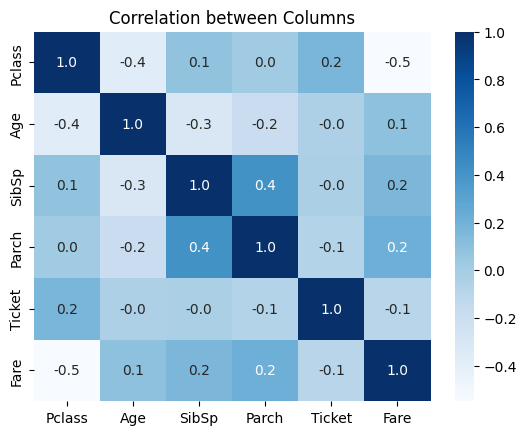

In [269]:
num_cols = x.dtypes[(x.dtypes=='int') | (x.dtypes =='float')].index.tolist()
correlation = x[num_cols].corr()
plt.title('Correlation between Columns')
sns.heatmap(correlation,annot=True,fmt='.1f',cmap='Blues')
plt.show()

In [270]:
fill_missing = ColumnTransformer([
    ('fill_Embarked', SimpleImputer(strategy='most_frequent'),[7]),
    #('fill_age',KNNImputer(weights='distance'), [3]),
    ('fill_age',IterativeImputer(random_state=0),[2,5])
],remainder='passthrough')

In [271]:
fill_missing

ColumnTransformer(remainder='passthrough',
                  transformers=[('fill_Embarked',
                                 SimpleImputer(strategy='most_frequent'), [7]),
                                ('fill_age', IterativeImputer(random_state=0),
                                 [2, 5])])

In [272]:
filled_data = fill_missing.fit_transform(x)
filled_data[0]

array(['S', 22.0, 521171.0, 3, 'male', 1, 0, 7.25], dtype=object)

In [273]:
filled_df = pd.DataFrame(data=filled_data,
                         columns=['Embarked','Age','Ticket','PClass','Sex','SibSp','Parch','Fare'])
filled_df.head()

,Embarked,Age,Ticket,PClass,Sex,SibSp,Parch,Fare
0,S,22.0,521171.0,3,male,1,0,7.25
1,C,38.0,17599.0,1,female,1,0,71.2833
2,S,26.0,23101282.0,3,female,0,0,7.925
3,S,35.0,113803.0,1,female,1,0,53.1
4,S,35.0,373450.0,3,male,0,0,8.05


In [274]:
filled_df.shape,train_df.shape

((891, 8), (891, 9))

In [275]:
filled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Embarked  891 non-null    object
 1   Age       891 non-null    object
 2   Ticket    891 non-null    object
 3   PClass    891 non-null    object
 4   Sex       891 non-null    object
 5   SibSp     891 non-null    object
 6   Parch     891 non-null    object
 7   Fare      891 non-null    object
dtypes: object(8)
memory usage: 55.8+ KB


In [276]:
filled_df.isnull().sum()

Embarked    0
Age         0
Ticket      0
PClass      0
Sex         0
SibSp       0
Parch       0
Fare        0
dtype: int64

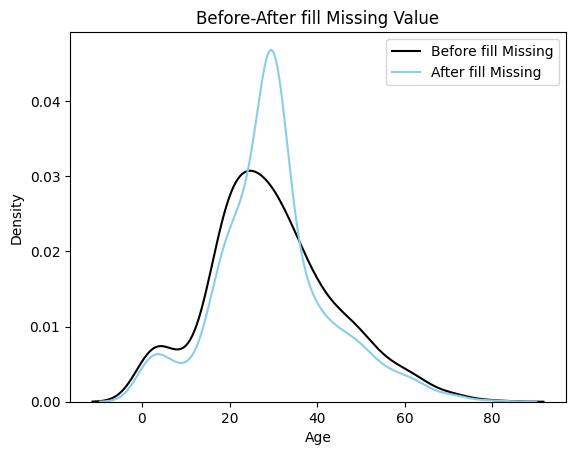

In [277]:
plt.title('Before-After fill Missing Value')
sns.kdeplot(data=train_df, x= 'Age',label='Before fill Missing',color='black')
sns.kdeplot(data=filled_df, x = 'Age', label ='After fill Missing',color='skyblue')
plt.legend()
plt.show()

In [278]:
filled_df.head()

,Embarked,Age,Ticket,PClass,Sex,SibSp,Parch,Fare
0,S,22.0,521171.0,3,male,1,0,7.25
1,C,38.0,17599.0,1,female,1,0,71.2833
2,S,26.0,23101282.0,3,female,0,0,7.925
3,S,35.0,113803.0,1,female,1,0,53.1
4,S,35.0,373450.0,3,male,0,0,8.05


In [279]:
# Column Transformer for preprocessing
preprocessing_data = ColumnTransformer([
    ('ordinal_encoder',OrdinalEncoder(),[0]),
    ('oneHotEncoder',OneHotEncoder(),[4])
],remainder='passthrough')

In [280]:
preprocessing_data

ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinal_encoder', OrdinalEncoder(), [0]),
                                ('oneHotEncoder', OneHotEncoder(), [4])])

In [281]:
preprocessing_data.fit_transform(filled_df)[0]

array([2.0, 0.0, 1.0, 22.0, 521171.0, 3, 1, 0, 7.25], dtype=object)

In [282]:
# create a pipeline to handle dataset in one step
pipeline = Pipeline([
    ('fill_missing', fill_missing),
    ('preprocessing', preprocessing_data)
])

In [283]:
pipeline

Pipeline(steps=[('fill_missing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('fill_Embarked',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [7]),
                                                 ('fill_age',
                                                  IterativeImputer(random_state=0),
                                                  [2, 5])])),
                ('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinal_encoder',
                                                  OrdinalEncoder(), [0]),
                                                 ('oneHotEncoder',
                                                  OneHotEncoder(), [4])]))])

In [284]:
x_train = pipeline.fit_transform(x).astype(float)
x_train[0]

array([2.00000e+00, 0.00000e+00, 1.00000e+00, 2.20000e+01, 5.21171e+05,
       3.00000e+00, 1.00000e+00, 0.00000e+00, 7.25000e+00])

# For TestSet

In [285]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [286]:
passengerId = test_df['PassengerId']
test_df.drop(['PassengerId','Name','Cabin'],axis=1,inplace=True)

test_df['Ticket'] = test_df['Ticket'].str.replace('[^0-9]', '', regex=True)

# Convert the column to numeric values (optional)
test_df['Ticket'] = pd.to_numeric(test_df['Ticket'], errors='coerce')

In [287]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,male,34.5,0,0,330911,7.8292,Q
1,3,female,47.0,1,0,363272,7.0000,S
2,2,male,62.0,0,0,240276,9.6875,Q
3,3,male,27.0,0,0,315154,8.6625,S
4,3,female,22.0,1,1,3101298,12.2875,S


In [288]:
test_df.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Ticket       0
Fare         1
Embarked     0
dtype: int64

In [289]:
test_df['Fare'].fillna(test_df['Fare'].mean(),inplace=True)

In [290]:
x_test = pipeline.fit_transform(test_df).astype(float)
x_test

array([[ 1.    ,  0.    ,  1.    , ...,  0.    ,  0.    ,  7.8292],
       [ 2.    ,  1.    ,  0.    , ...,  1.    ,  0.    ,  7.    ],
       [ 1.    ,  0.    ,  1.    , ...,  0.    ,  0.    ,  9.6875],
       ...,
       [ 2.    ,  0.    ,  1.    , ...,  0.    ,  0.    ,  7.25  ],
       [ 2.    ,  0.    ,  1.    , ...,  0.    ,  0.    ,  8.05  ],
       [ 0.    ,  0.    ,  1.    , ...,  1.    ,  1.    , 22.3583]])

In [291]:
x_train.shape, x_test.shape

((891, 9), (418, 9))

In [292]:
y_test = np.array(y_test_df['Survived'])
y_test[0:10]

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0])

In [293]:
x_test.shape,y_test.shape

((418, 9), (418,))

In [294]:
x_train.shape,y_train.shape

((891, 9), (891,))

# Data Modeling

In [295]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

In [296]:
x_train.shape, y_train.shape

((891, 9), (891,))

In [297]:
def train_classification_models(x_train, y_train):
    models = {
        'RandomForest': RandomForestClassifier(),
        'GradientBoosting': GradientBoostingClassifier(),
        'LogisticRegression': LogisticRegression(),
        'NaiveBayes': GaussianNB(),
        'SupportVectorMachine': SVC(),
        'NeuralNetwork': MLPClassifier(),
    }

    trained_models = {}
    for name, model in models.items():
        model.fit(x_train, y_train)
        trained_models[name] = model

    return trained_models

In [298]:
train_models = train_classification_models(x_train,y_train)

In [299]:
def evaluate_classification_models(x_test, y_test, trained_models):
    results = []

    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()

    for i, (name, model) in enumerate(trained_models.items()):
        y_pred = model.predict(x_test)
        score = model.score(x_test, y_test)
        cm = confusion_matrix(y_test, y_pred)

        results.append({'model_name': name, 'score': score})

        # Plotting confusion matrix as a heatmap
        sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', ax=axes[i])
        axes[i].set_title(f'{name}\nAccuracy: {score:.2f}')
        axes[i].set_xlabel('Predicted Label')
        axes[i].set_ylabel('True Label')

    plt.tight_layout()
    plt.show()

    results_df = pd.DataFrame(results)
    return results_df

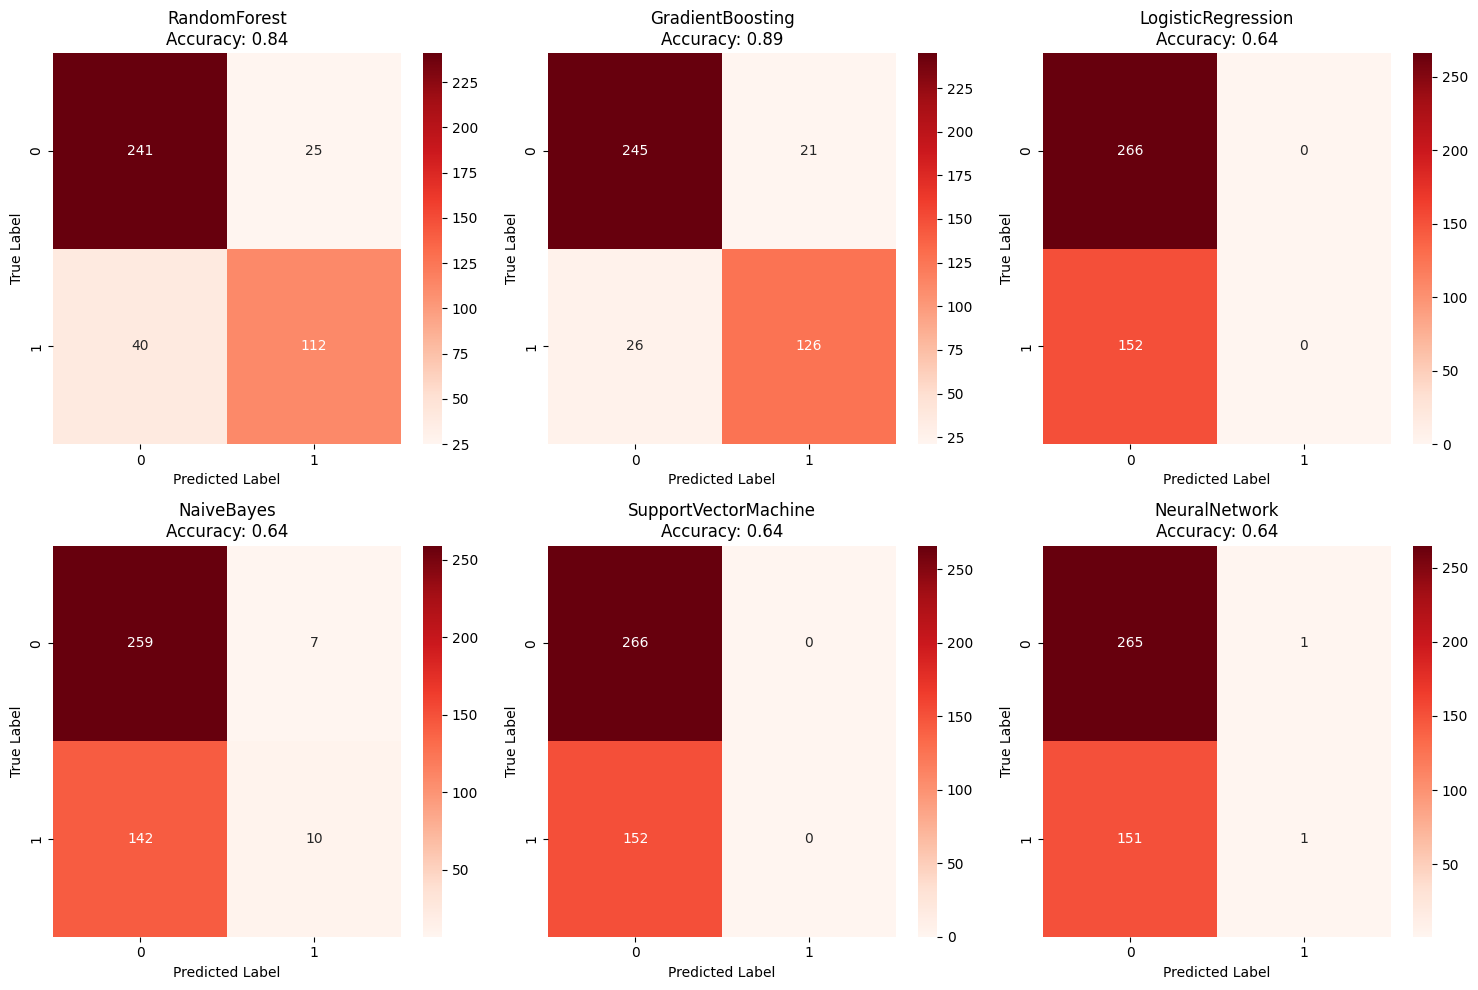

,model_name,score
0,RandomForest,0.844498
1,GradientBoosting,0.887560
2,LogisticRegression,0.636364
3,NaiveBayes,0.643541
4,SupportVectorMachine,0.636364
5,NeuralNetwork,0.636364


In [300]:
evaluate_classification_models(x_test,y_test,train_models)

In [301]:
y_test_pred = train_models['GradientBoosting'].predict(x_test)
y_test_pred[0:10]

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0])

In [302]:
y_test_pred_prob = train_models['GradientBoosting'].predict_proba(x_test)[:,1]
y_test_pred_prob[0:10]

array([0.10896991, 0.15817082, 0.06745017, 0.0960091 , 0.64897278,
       0.09723471, 0.65863327, 0.17637212, 0.94541328, 0.09502573])

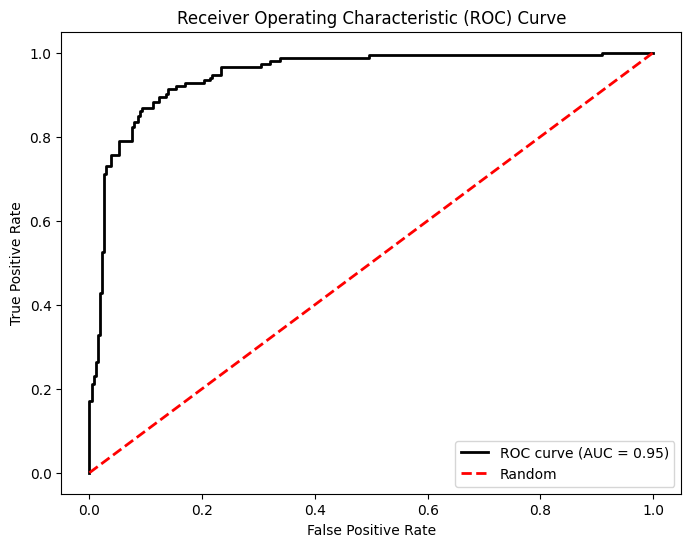

In [303]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_prob)
# Calculate the AUC
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='black', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [304]:
report = classification_report(y_test,y_test_pred)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       266
           1       0.86      0.83      0.84       152

    accuracy                           0.89       418
   macro avg       0.88      0.88      0.88       418
weighted avg       0.89      0.89      0.89       418



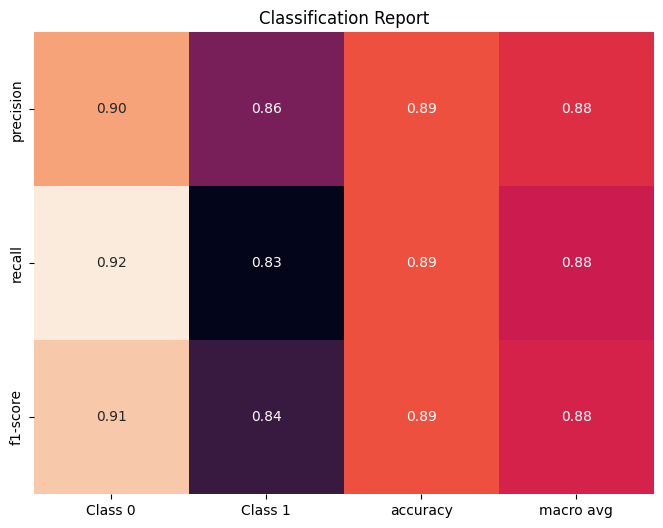

In [305]:
report_dict = classification_report(y_test, y_test_pred, target_names=['Class 0', 'Class 1'], output_dict=True)
# Convert the report dictionary to a Pandas DataFrame for better visualization
report_df = pd.DataFrame(report_dict)
# Plot the classification report using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, fmt=".2f", cbar=False)
plt.title('Classification Report')
plt.show()

# Submission

In [306]:
y_test_pred = train_models['GradientBoosting'].predict(x_test)
y_test_pred[0:10]

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0])

In [307]:
df_dict = {'PassengerId':passengerId, 'Survived': y_test_pred}
sub_df = pd.DataFrame(df_dict)
sub_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [308]:
sub_df.to_csv('submission.csv',index=False)